# 🧪 Marketing A/B Testing Analysis Portfolio
## Statistical Testing for Digital Marketing Campaign Optimization

## 📋 Project Overview

**Goal**: Evaluate the effectiveness of marketing campaigns through rigorous A/B testing  
**Method**: Statistical hypothesis testing with proper assumption validation  
**Dataset**: Marketing campaign data with user behavior metrics  
**Data Source**: [Marketing A/B Testing Dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing)

**Key Analysis Components:**
1. **Data Quality Assessment** - Duplicate detection and data cleaning
2. **Exploratory Data Analysis** - Conversion rate patterns and distributions  
3. **Statistical Testing** - Chi-squared tests for categorical variables
4. **Business Insights** - Data-driven interpretation of results


### 프로젝트 개요

**목적**: A/B 테스팅 워크플로우 이해 및 마케팅 데이터에 통계 방법론 적용  
**중점**: 카이제곱 독립성 검정을 통한 범주형 변수 분석  


**주요 분석 구성요소:**
1. **데이터 품질 평가** - 중복 검사 및 데이터 정제
2. **탐색적 데이터 분석** - 전환율 패턴 및 분포 분석
3. **통계 검정** - 범주형 변수에 대한 카이제곱 검정
4. **비즈니스 인사이트** - 데이터 기반 결과 해석

---

## 🎯 Analysis Scope

### ✅ **Completed Analysis:**
1. **Data Quality Assessment** - Duplicate detection and data cleaning
2. **Univariate Analysis** - Individual variable distributions (pie charts, histograms)
3. **Bivariate Analysis** - Conversion patterns across different factors
4. **Statistical Testing** - Chi-squared tests for categorical variables
5. **Business Interpretation** - Data-driven insights and implications

### 🔄 **Future Extensions:**
- **Numerical Variable Testing**: t-tests or Mann-Whitney U tests for 'total ads'
- **Advanced Statistical Methods**: ANOVA for multiple group comparisons
- **Effect Size Analysis**: Practical significance beyond statistical significance



### 분석 범위

**완료된 분석:**
1. **데이터 품질 평가** - 중복 검사 및 데이터 정제
2. **단변량 분석** - 개별 변수 분포 (파이차트, 히스토그램 등)
4. **이변량 분석** - 다양한 요인별 전환 패턴 분석
5. **통계 검정** - 범주형 변수에 대한 카이제곱 검정
6. **비즈니스 해석** - 데이터 기반 인사이트

**향후 확장:**
- **수치형 변수 검정**: '총 광고 수'에 대한 t-검정 또는 만-휘트니 U 검정
- **고급 통계 방법**: 다중 그룹 비교를 위한 분산분석
- **효과 크기 분석**: 통계적 유의성을 넘어선 실용적 유의성

---

## 🤔 What I Learned

This project helped me understand the basic A/B testing process. The categorical analysis provided valuable insights into conversion patterns, and while there's much more I could explore with numerical variables, I gained solid experience with statistical testing fundamentals and data interpretation.  


이 프로젝트를 통해 기본적인 A/B 테스팅 과정을 이해할 수 있었습니다. 범주형 분석으로 전환 패턴에 대한 유용한 인사이트를 얻었고, 수치형 변수로 더 탐구할 부분이 많지만, 통계 검정의 기초와 데이터 해석에 대한 탄탄한 경험을 쌓았습니다.

# 📊 Step 1: Data Loading and Initial Exploration
**데이터 로드 및 초기 탐색**

In [54]:
# Import necessary libraries for A/B testing analysis
# A/B 테스팅 분석을 위한 필수 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Load the marketing A/B test dataset
# 마케팅 A/B 테스트 데이터셋 로드
df = pd.read_csv('marketing_ab_data.csv')

# Examine the structure and content of our dataset
# 데이터셋의 구조와 내용 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [56]:
# Check first few observations
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


# 🔍 Step 2: Data Quality Assessment
**데이터 품질 평가**

### Data Understanding:
**데이터 이해:**
- **test group**: Experimental conditions (ad vs control) - If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
- **converted**: Target variable (True/False conversion) - If a person bought the product then True, else is False
- **total ads**: Number of ads shown to user
- **most ads day**: Day with highest ad exposure
- **most ads hour**: Hour with highest ad exposure

**테스트 그룹, 전환 여부, 총 광고 수, 최다 광고 요일/시간 정보**

In [57]:
# Clean the dataset by removing unnecessary columns
# 불필요한 컬럼 제거를 통한 데이터셋 정리
print("Cleaning dataset...")
print("데이터셋 정리 중...")

# Remove index column and user ID (not needed for analysis)
# 인덱스 컬럼과 사용자 ID 제거 (분석에 불필요)
df_clean = df.drop(['Unnamed: 0', 'user id'], axis=1)

print(f"\nCleaned dataset shape: {df_clean.shape}")
print(f"Remaining columns: {list(df_clean.columns)}")

df_clean.head()

Cleaning dataset...
데이터셋 정리 중...

Cleaned dataset shape: (588101, 5)
Remaining columns: ['test group', 'converted', 'total ads', 'most ads day', 'most ads hour']


,test group,converted,total ads,most ads day,most ads hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [59]:
# Check if the categorical variables have appropriate number of levels
df_cat = df[['test group','converted','most ads day','most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [60]:
# Check if the categorical variables have appropriate levels
for i in df_cat.columns:
    print(i.upper(),":",df_cat[i].unique())

TEST GROUP : ['ad' 'psa']
CONVERTED : [False  True]
MOST ADS DAY : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


# 📈 Step 3: Exploratory Data Analysis
**탐색적 데이터 분석**

### Understanding Conversion Patterns
**전환 패턴 이해**

## 1. Univariate analysis

**단변량 분석**

**Understanding Individual Variable Distributions**  
**개별 변수 분포 이해**

Analyzing each variable independently to understand:
- Categorical vs. Numerical variables
- Distribution patterns and central tendencies
- Data quality and potential outliers  
- Baseline conversion rates and user behavior patterns

**각 변수를 독립적으로 분석하여 분포 패턴, 데이터 품질, 기준 전환율 등을 파악**

### Categorical

=== Analysis of 'test group' ===
<테스트 그룹 분포 분석>

Test Group Distribution:
ad: 564577 users (96.00%)
psa: 23524 users (4.00%)


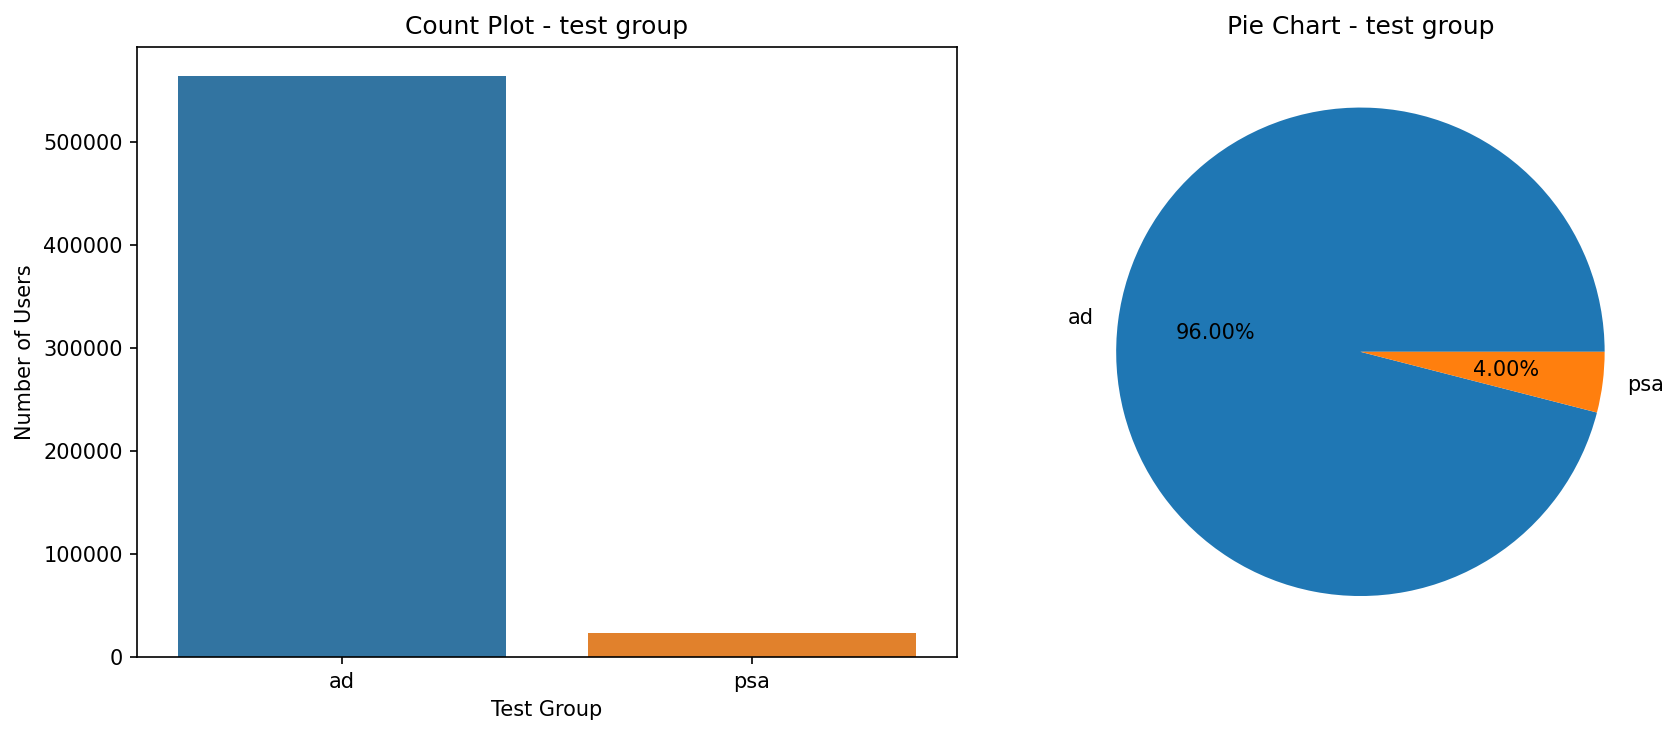

In [61]:
# Analyze test group distribution
# 테스트 그룹 분포 분석
variable = 'test group'

print(f"=== Analysis of '{variable}' ===")
print(f"<테스트 그룹 분포 분석>")

group_stats = df_cat[variable].value_counts()
group_rates = df_cat[variable].value_counts(normalize=True) * 100

print(f"\nTest Group Distribution:")
for group, count in group_stats.items():
    rate = group_rates[group]
    print(f"{group}: {count} users ({rate:.2f}%)")

# Create count plot and pie chart
# 카운트 플롯과 파이 차트 생성
plt.figure(figsize=(12,5),dpi=150)

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,
             hue=variable,
             palette='tab10')
plt.title(f'Count Plot - {variable}')
plt.xlabel('Test Group')
plt.ylabel('Number of Users')

# Pie chart
colors = sns.color_palette('tab10')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%',
        colors=colors)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

=== Analysis of 'converted' (Target Variable) ===
<목표 변수 'converted' 분석>

Conversion Counts:
converted
False    573258
True      14843
Name: count, dtype: int64

Conversion Rates:
False: 97.48%
True: 2.52%


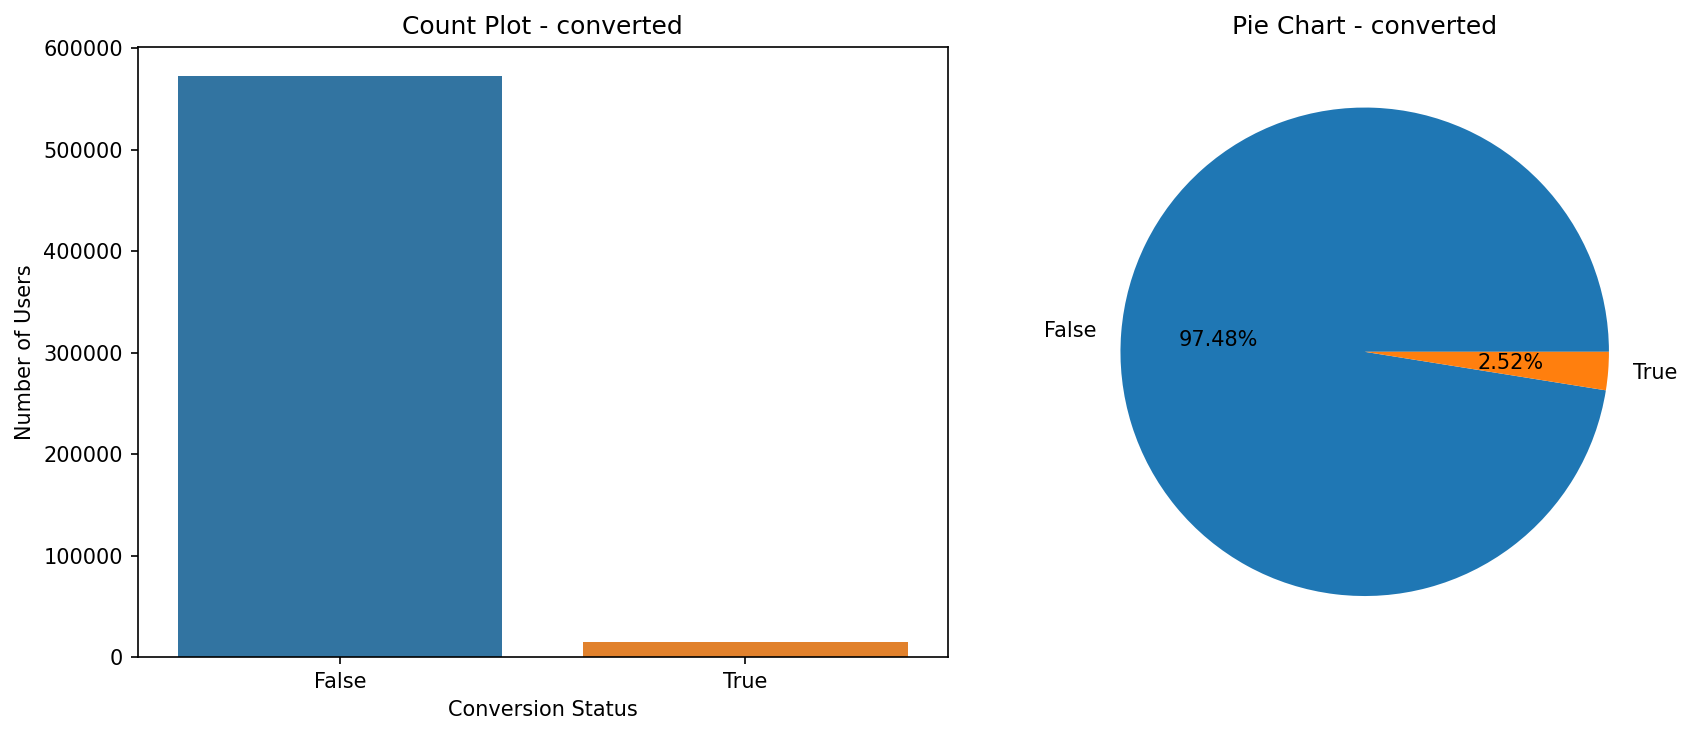

In [62]:
# Analyze the target variable: converted
# 목표 변수 분석: 전환 여부
variable = 'converted'

print(f"=== Analysis of '{variable}' (Target Variable) ===")
print(f"<목표 변수 '{variable}' 분석>")

# Get conversion rate statistics
# 전환율 통계 확인
conversion_stats = df_cat[variable].value_counts()
conversion_rates = df_cat[variable].value_counts(normalize=True) * 100

print(f"\nConversion Counts:")
print(conversion_stats)
print(f"\nConversion Rates:")
for status, rate in conversion_rates.items():
    print(f"{status}: {rate:.2f}%")

# Create count plot and pie chart
# 카운트 플롯과 파이 차트 생성
plt.figure(figsize=(12,5),dpi=150)

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,hue=variable,palette='tab10',legend=False)
plt.title(f'Count Plot - {variable}')
plt.xlabel('Conversion Status')
plt.ylabel('Number of Users')

# Pie chart
colors = sns.color_palette('tab10')

plt.subplot(1,2,2)
counts = df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index,autopct='%0.2f%%',
        colors=colors)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

=== Analysis of 'most ads day' ===
<최다 광고 요일 분석>

Most Ads Day Distribution:
most ads day
Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: count, dtype: int64


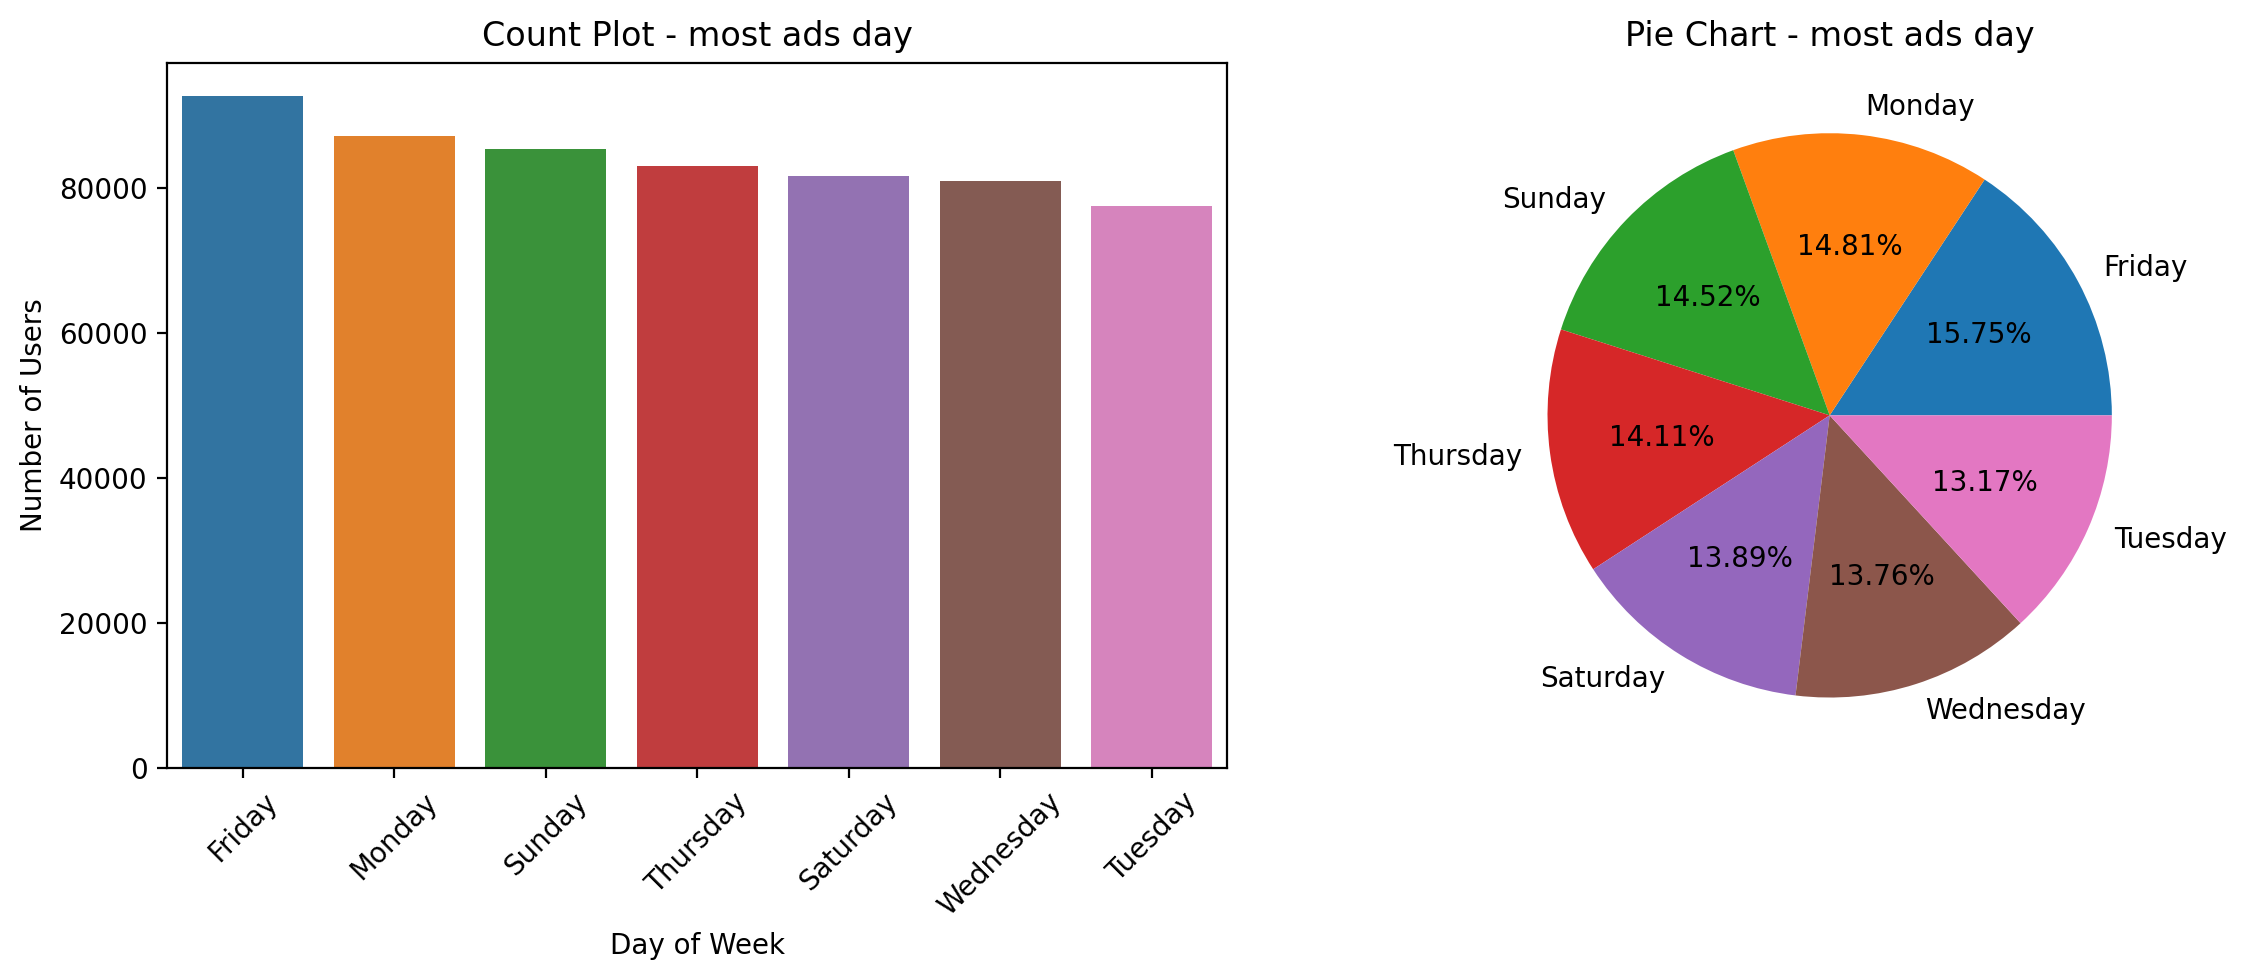

In [63]:
# Analyze most ads day distribution
# 최다 광고 요일 분포 분석
variable = 'most ads day'

print(f"=== Analysis of '{variable}' ===")
print(f"<최다 광고 요일 분석>")

day_stats = df_cat[variable].value_counts()
print(f"\nMost Ads Day Distribution:")
print(day_stats)

plt.figure(figsize=(12,5),dpi=200)

order = df_cat[variable].value_counts().index
colors = sns.color_palette('tab10', len(order))
counts = df_cat[variable].value_counts()

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,
              data=df_cat,
              order=order,
              hue=variable,
              hue_order=order,
              palette=colors,
              legend=False
)
plt.title(f'Count Plot - {variable}')
plt.xlabel('Day of Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# Pie chart -> 카데고리가 많을 경우 유의미하지 않지만..
plt.subplot(1,2,2)
plt.pie(counts,labels=counts.index,autopct='%0.2f%%',colors=colors)
plt.title(f'Pie Chart - {variable}')

# Adjust layout
plt.tight_layout()
plt.show()

=== Analysis of 'most ads hour' ===
<최다 광고 시간 분석>


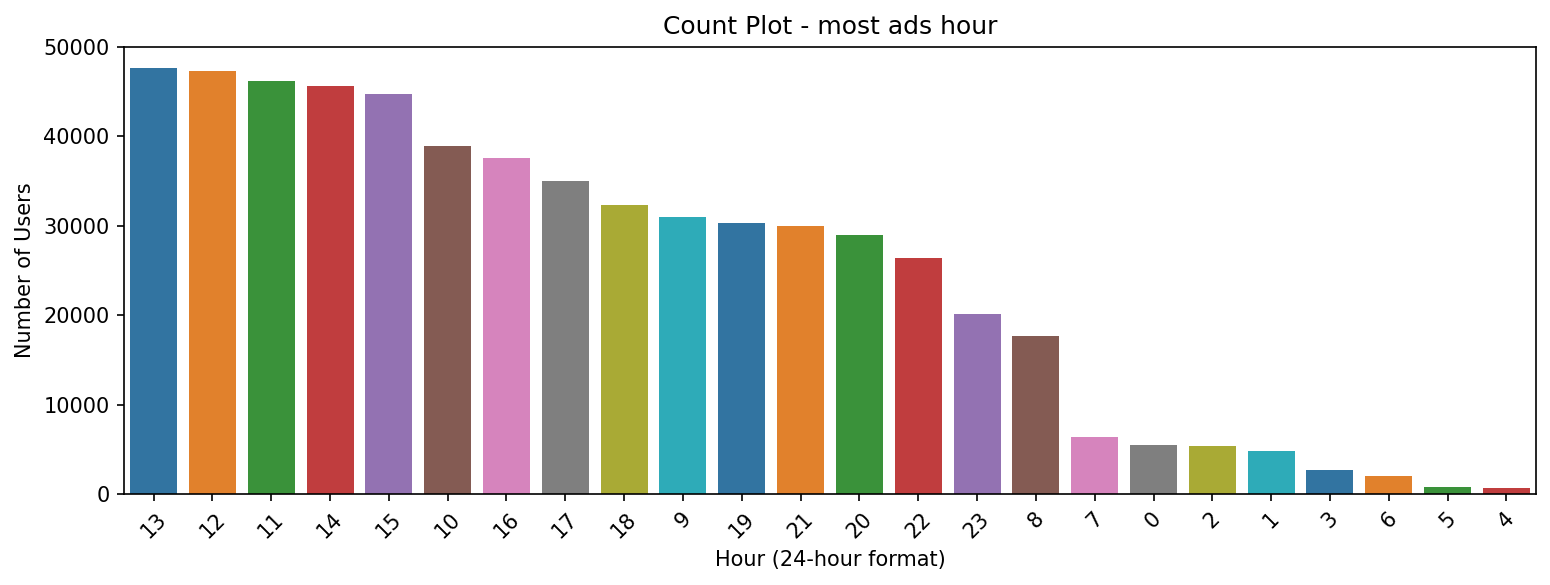

In [24]:
# Analyze most ads hour distribution
# 최다 광고 시간 분포 분석
variable = 'most ads hour'

print(f"=== Analysis of '{variable}' ===")
print(f"<최다 광고 시간 분석>")

plt.figure(figsize=(20,4),dpi=150)

order = df_cat[variable].value_counts().index
colors = sns.color_palette('tab10', len(order))
counts = df_cat[variable].value_counts()

# Count plot
plt.subplot(1,2,1)
sns.countplot(x=variable,
              data=df_cat,
              order=order,
              hue=variable,
              hue_order=order,
              palette=colors,
              legend=False 
          
)
plt.title(f'Count Plot - {variable}')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)

# # Top hours pie chart (top 8 hours)
# plt.subplot(1, 2, 2)
# top_hours = df_cat[variable].value_counts().head(8)
# plt.pie(top_hours, labels=top_hours.index, autopct='%0.1f%%')
# plt.title(f'Top 8 Hours - {variable}')

plt.tight_layout()
plt.show()

### Numerical

In [64]:
# Analyze total ads distribution (numerical variable)
# 총 광고 수 분포 분석 (수치형 변수)

print(f"=== Analysis of '{variable}' (Numerical Variable) ===")
print(f"수치형 변수 '{variable}' 분석")

# Descriptive statistics
# 기술통계
print(f"\nDescriptive Statistics:")
df['total ads'].describe().to_frame()

=== Analysis of 'most ads day' (Numerical Variable) ===
수치형 변수 'most ads day' 분석

Descriptive Statistics:


,total ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


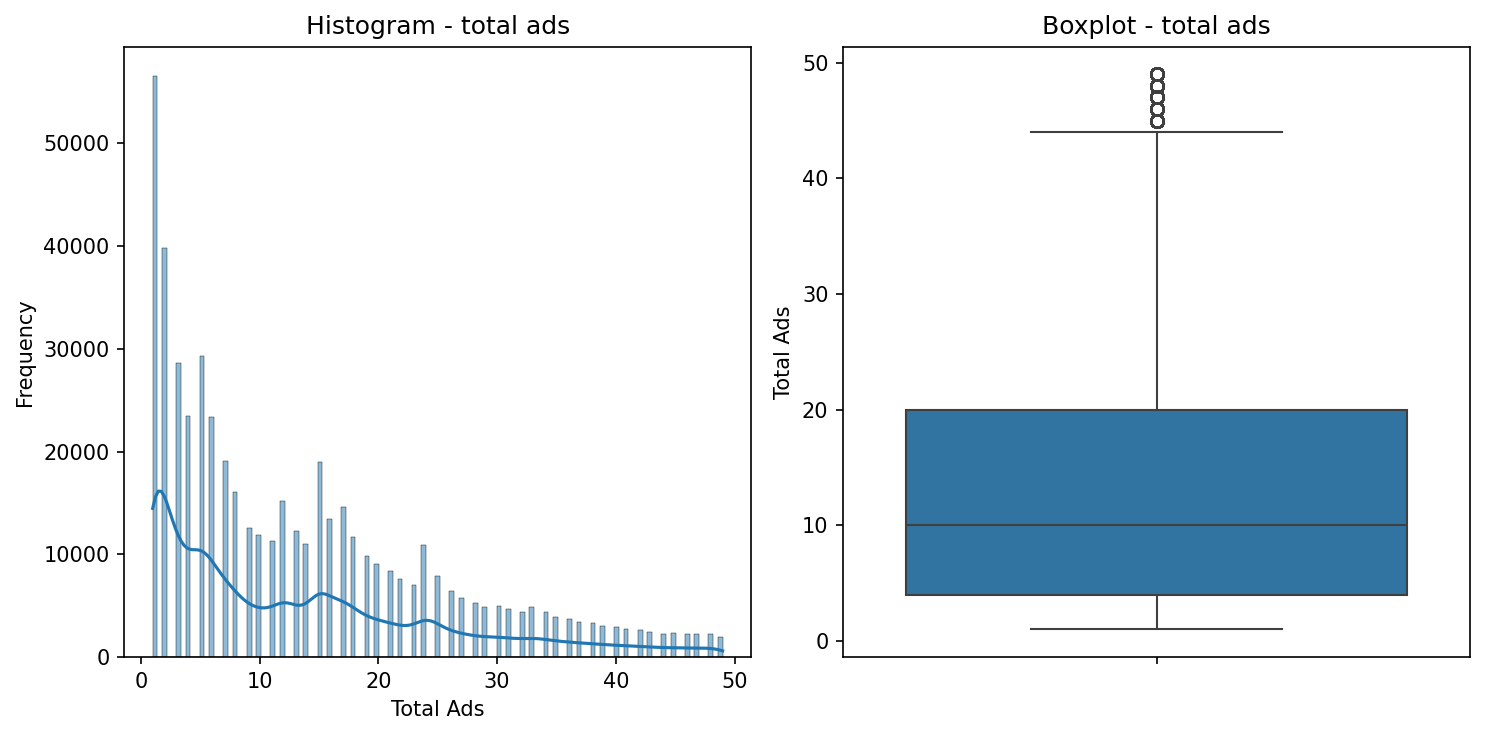

In [65]:
variable = 'total ads'

plt.figure(figsize=(10,5),dpi=150)

# Histogram
plt.subplot(1,2,1)
# Filtering the data for a value close to 75th percentile only for the better visualization
sns.histplot(x=variable,data=df[df['total ads']<50],kde=True)
plt.title(f'Histogram - {variable}')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')

# Box plot
plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df['total ads']<50])
plt.title(f'Boxplot - {variable}')
plt.ylabel('Total Ads')

# Adjust layout
plt.tight_layout()
plt.show()

## 2. Bivariate Analysis
**이변량 분석**

### Exploring Relationships Between Variables and Conversion
**나머지 변수들과 전환 변수 간의 관계 탐색**

Analyzing how different variables relate to conversion outcomes:
- Test group effectiveness comparison
- Temporal patterns in conversion (day/hour analysis)
- Ad exposure impact on conversion rates

**다양한 변수들이 전환 결과와 어떤 관계를 갖는지 분석: 테스트 그룹 효과성, 시간적 패턴, 광고 노출 영향**

In [167]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [66]:
# Analyze conversion rates by test group
# 테스트 그룹별 전환율 분석
print("=== Conversion Analysis by Test Group ===")
print("<테스트 그룹별 전환 분석>")

# Calculate conversion rates by group
# 그룹별 전환율 계산
group_conversion = df.groupby('test group')['converted'].agg(['count', 'sum', 'mean']).round(4)
group_conversion['conversion_rate_pct'] = group_conversion['mean'] * 100

print(f"\nConversion Rates by Test Group:")
for group in group_conversion.index:
    count = group_conversion.loc[group, 'count']
    conversions = group_conversion.loc[group, 'sum']
    rate = group_conversion.loc[group, 'conversion_rate_pct']
    print(f"{group.upper()}: {conversions}/{count} = {rate:.3f}%")

=== Conversion Analysis by Test Group ===
<테스트 그룹별 전환 분석>

Conversion Rates by Test Group:
AD: 14423/564577 = 2.550%
PSA: 420/23524 = 1.790%


In [33]:
# ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize = 'index')
# ct_conversion_test_group

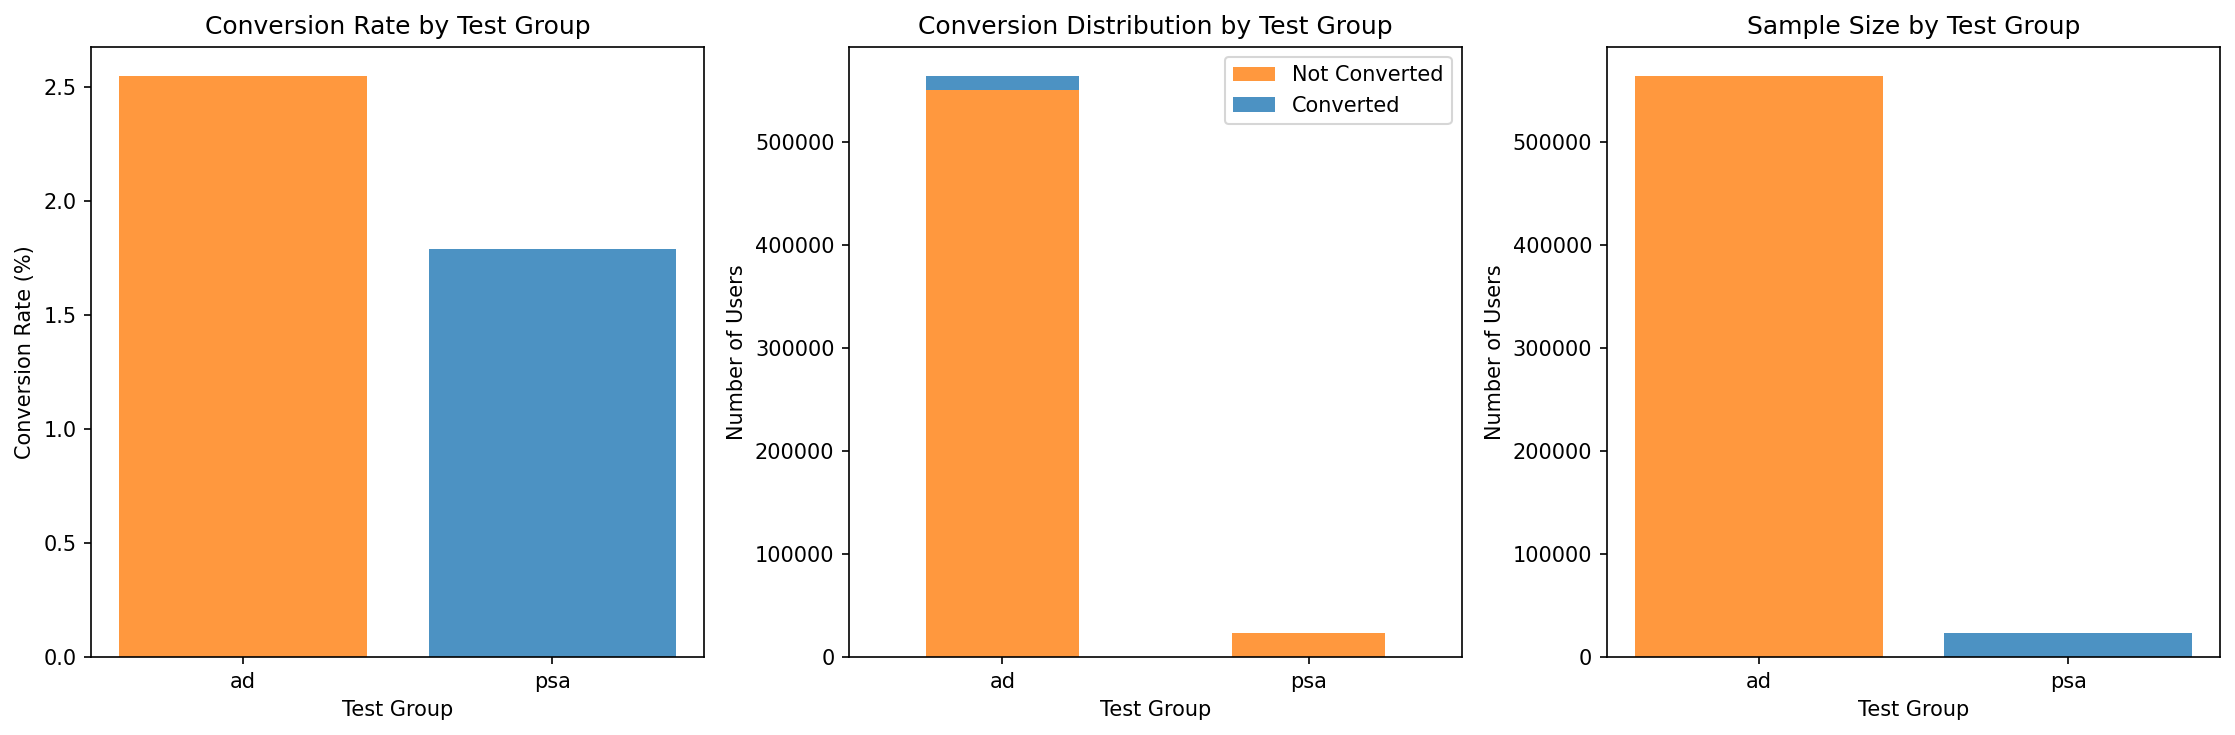

In [67]:
# Visualization
plt.figure(figsize=(15, 5),dpi=150)

# Conversion rate comparison
plt.subplot(1, 3, 1)
bars = plt.bar(group_conversion.index, group_conversion['conversion_rate_pct'], 
               color=['#ff7f0e', '#1f77b4'], alpha=0.8)
plt.title('Conversion Rate by Test Group')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Test Group')

# Stacked bar chart showing converted vs not converted
plt.subplot(1, 3, 2)
conv_crosstab = pd.crosstab(df['test group'], df['converted'])
conv_crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), 
                   color=['#ff7f0e', '#1f77b4'], alpha=0.8)
plt.title('Conversion Distribution by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Number of Users')
plt.legend(['Not Converted', 'Converted'])
plt.xticks(rotation=0)

# Sample size comparison
plt.subplot(1, 3, 3)
sample_sizes = df['test group'].value_counts()
plt.bar(sample_sizes.index, sample_sizes.values, 
        color=['#ff7f0e', '#1f77b4'], alpha=0.8)
plt.title('Sample Size by Test Group')
plt.ylabel('Number of Users')
plt.xlabel('Test Group')

plt.tight_layout()
plt.show()

In [68]:
# Analyze conversion rates by day of week
# 요일별 전환율 분석
print("=== Conversion Analysis by Day of Week ===")
print("<요일별 전환 분석>")

ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
print(ct_conversion_day.sort_values(by=True,ascending=False))

=== Conversion Analysis by Day of Week ===
<요일별 전환 분석>
converted        False     True 
most ads day                    
Monday        0.967188  0.032812
Tuesday       0.970160  0.029840
Wednesday     0.975058  0.024942
Sunday        0.975524  0.024476
Friday        0.977788  0.022212
Thursday      0.978429  0.021571
Saturday      0.978949  0.021051


In [69]:
day_conversion = df.groupby('most ads day')['converted'].agg(['count', 'sum', 'mean']).round(4)
day_conversion['conversion_rate_pct'] = day_conversion['mean'] * 100
day_conversion = day_conversion.sort_values('conversion_rate_pct', ascending=False)

print(f"\nConversion Rates by Day (Highest to Lowest):")
for day in day_conversion.index:
    rate = day_conversion.loc[day, 'conversion_rate_pct']
    count = day_conversion.loc[day, 'count']
    print(f"{day}: {rate:.3f}% (n={count})")


Conversion Rates by Day (Highest to Lowest):
Monday: 3.280% (n=87073)
Tuesday: 2.980% (n=77479)
Wednesday: 2.490% (n=80908)
Sunday: 2.450% (n=85391)
Friday: 2.220% (n=92608)
Thursday: 2.160% (n=82982)
Saturday: 2.110% (n=81660)


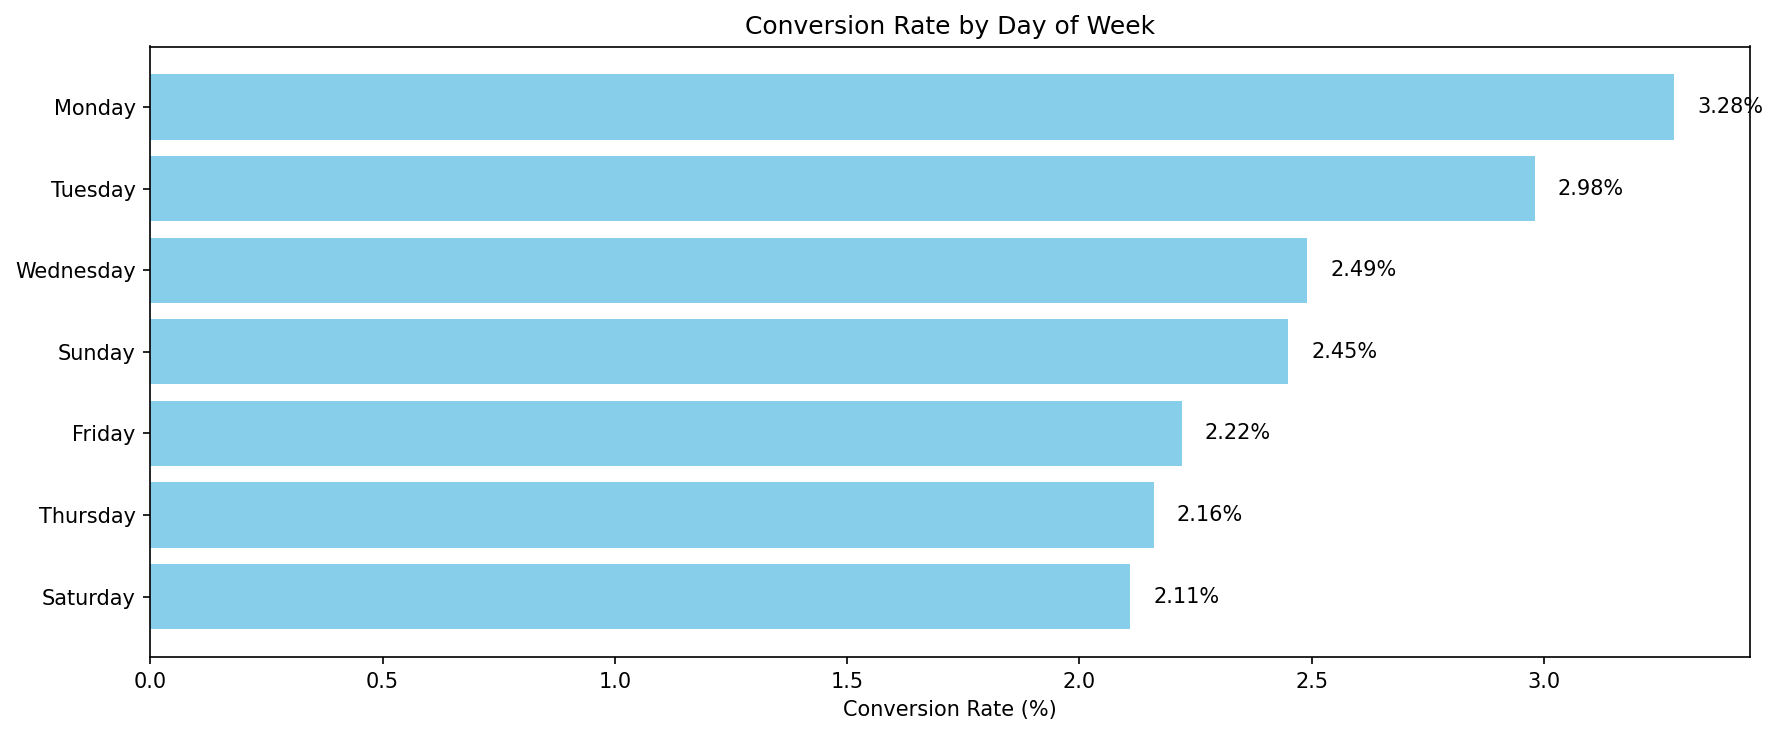

In [70]:
plt.figure(figsize=(12, 5),dpi=150)

# Conversion rate by day
day_order = day_conversion.sort_values('conversion_rate_pct', ascending=True).index
plt.barh(range(len(day_order)), 
         day_conversion.loc[day_order, 'conversion_rate_pct'],color='skyblue')
plt.yticks(range(len(day_order)), day_order)
plt.xlabel('Conversion Rate (%)')
plt.title('Conversion Rate by Day of Week')

# Add percentage labels
for i, day in enumerate(day_order):
    rate = day_conversion.loc[day, 'conversion_rate_pct']
    plt.text(rate + 0.05, i, f'{rate:.2f}%', va='center')

plt.tight_layout()
plt.show()

=== Conversion Analysis by Hour ===
시간별 전환 분석

Top 5 Hours for Conversion:
Hour 16: 3.080% (n=37567)
Hour 20: 2.980% (n=28923)
Hour 15: 2.970% (n=44683)
Hour 21: 2.890% (n=29976)
Hour 17: 2.820% (n=34988)

Bottom 5 Hours for Conversion:
Hour 2: 0.730% (n=5333)
Hour 3: 1.050% (n=2679)
Hour 1: 1.290% (n=4802)
Hour 4: 1.520% (n=722)
Hour 7: 1.810% (n=6405)


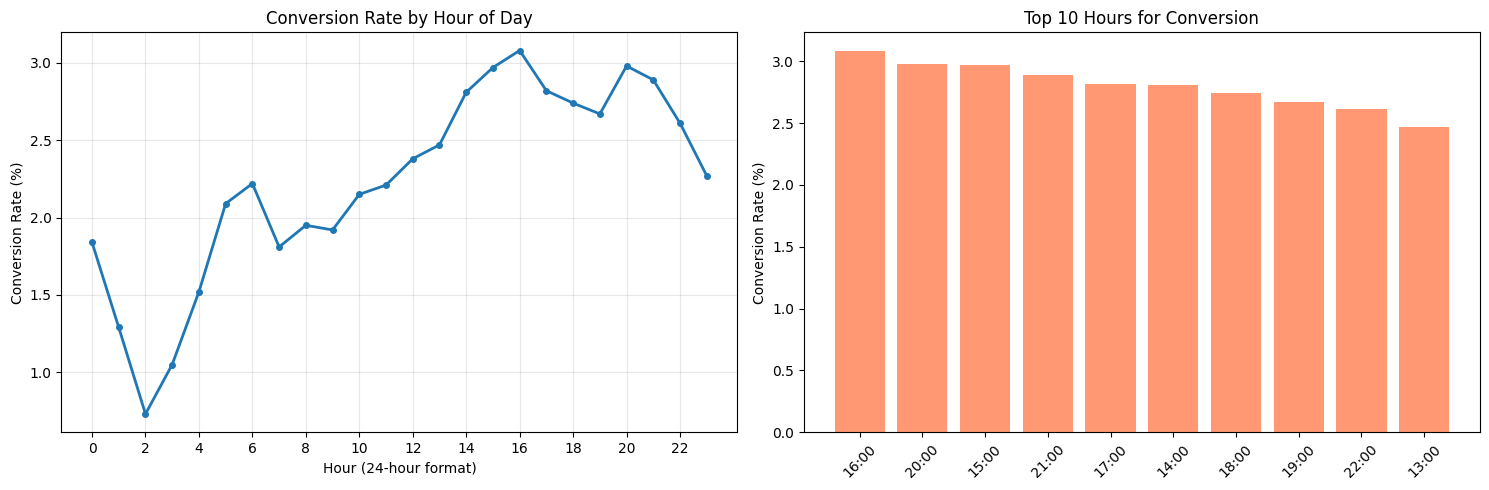

In [71]:
# Analyze conversion rates by hour
# 시간별 전환율 분석
print("=== Conversion Analysis by Hour ===")
print("<시간별 전환 분석>")

hour_conversion = df.groupby('most ads hour')['converted'].agg(['count', 'sum', 'mean']).round(4)
hour_conversion['conversion_rate_pct'] = hour_conversion['mean'] * 100

# Show top and bottom performing hours
print(f"\nTop 5 Hours for Conversion:")
top_hours = hour_conversion.sort_values('conversion_rate_pct', ascending=False).head()
for hour in top_hours.index:
    rate = top_hours.loc[hour, 'conversion_rate_pct']
    count = top_hours.loc[hour, 'count']
    print(f"Hour {hour}: {rate:.3f}% (n={count})")

print(f"\nBottom 5 Hours for Conversion:")
bottom_hours = hour_conversion.sort_values('conversion_rate_pct', ascending=True).head()
for hour in bottom_hours.index:
    rate = bottom_hours.loc[hour, 'conversion_rate_pct']
    count = bottom_hours.loc[hour, 'count']
    print(f"Hour {hour}: {rate:.3f}% (n={count})")

plt.figure(figsize=(15, 5))

# Hourly conversion rate line plot
plt.subplot(1, 2, 1)
hour_sorted = hour_conversion.sort_index()
plt.plot(hour_sorted.index, hour_sorted['conversion_rate_pct'], 
         marker='o', linewidth=2, markersize=4)
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate by Hour of Day')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24, 2))

# Top hours bar plot
plt.subplot(1, 2, 2)
top_10_hours = hour_conversion.sort_values('conversion_rate_pct', ascending=False).head(10)
plt.bar(range(len(top_10_hours)), top_10_hours['conversion_rate_pct'], 
        color='coral', alpha=0.8)
plt.xticks(range(len(top_10_hours)), [f'{h}:00' for h in top_10_hours.index], rotation=45)
plt.ylabel('Conversion Rate (%)')
plt.title('Top 10 Hours for Conversion')

plt.tight_layout()
plt.show()

=== Ad Exposure vs Conversion Analysis ===
<광고 노출 vs 전환 비교 분석>


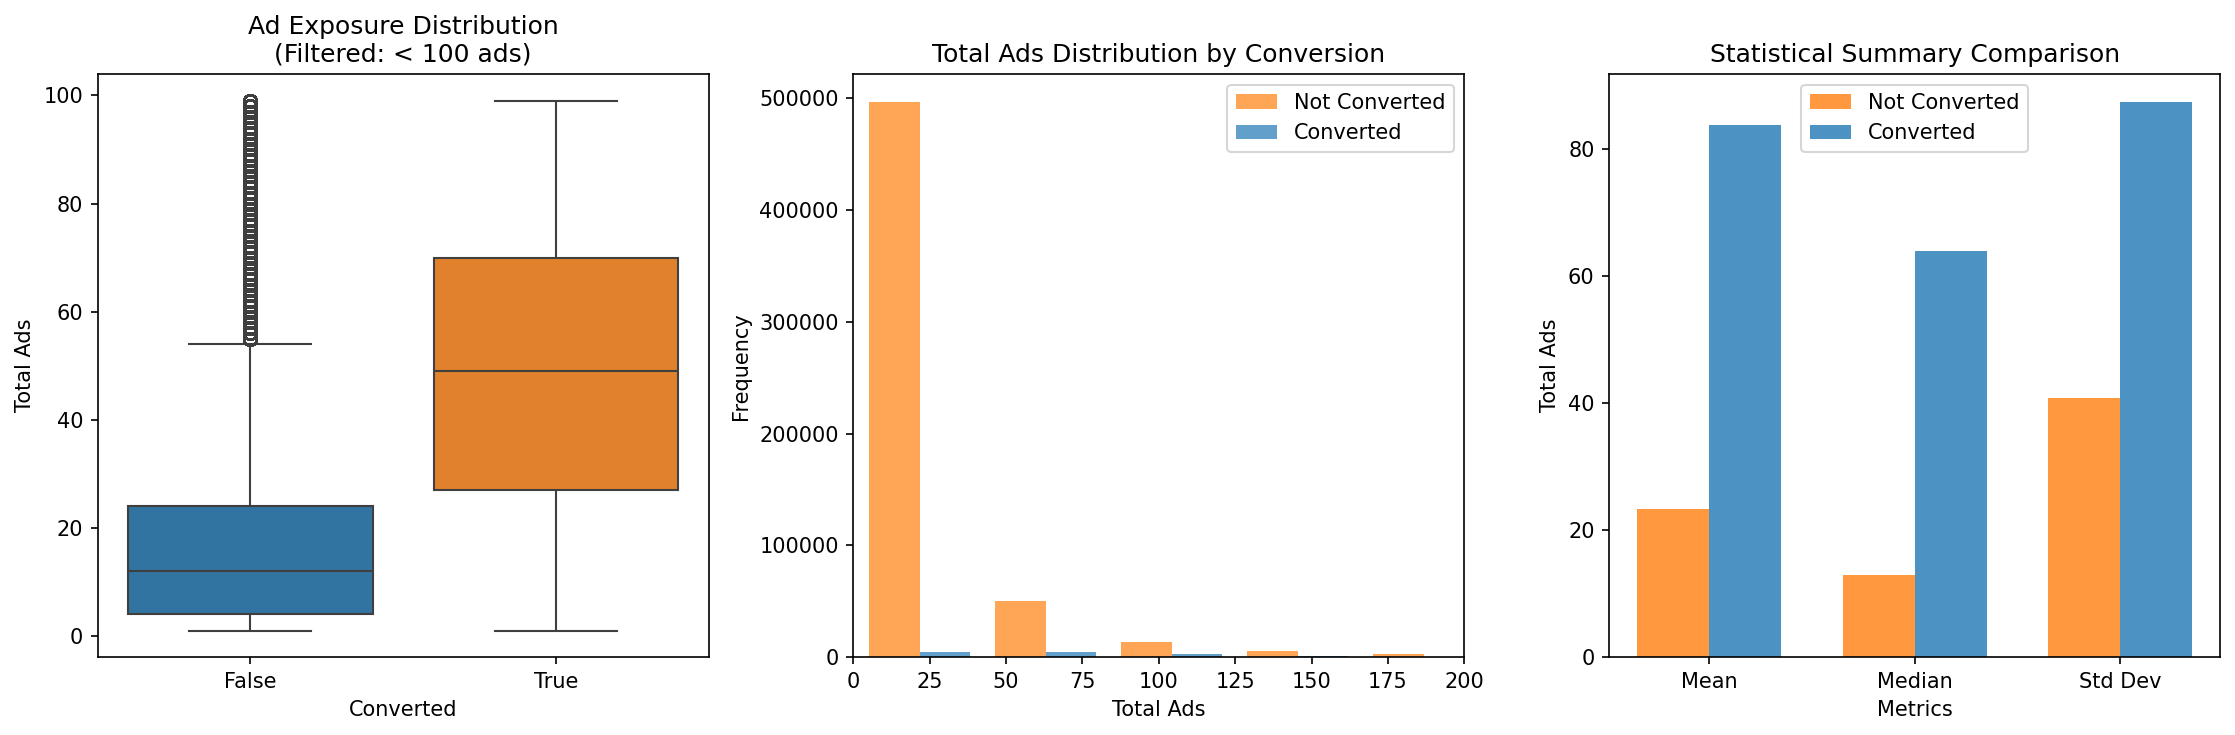


=== 🎯 Ad Effect Assessment ===
분석 결과를 통한 광고 효과 평가:

1. Positive finding: Users with higher ad exposure show better conversion rates
✅ 긍정적 발견: 광고를 더 많이 본 사용자들이 실제로 더 많이 전환함

2. Concern: Only 2.5% of total users convert
⚠️ 우려사항: 전체 사용자의 2.5%만 전환함

3. Reality: Statistical effect exists but overall conversion remains low
📊 현실: 통계적 효과는 있지만 전체 전환율은 여전히 낮음


In [89]:
# Analyze relationship between ad exposure and conversion
# 광고 노출과 전환 간의 관계 분석
print("=== Ad Exposure vs Conversion Analysis ===")
print("<광고 노출 vs 전환 비교 분석>")

# Compare ad exposure between converted and non-converted users
# 전환 사용자와 비전환 사용자 간 광고 노출 비교
exposure_by_conversion = df.groupby('converted')['total ads'].describe()


# Visualization 시각화
plt.figure(figsize=(15, 5),dpi=150)

# Box plot comparison (filtered for better visualization)
plt.subplot(1, 3, 1)
palette = sns.color_palette('tab10', 2)
sns.boxplot(x='converted', y='total ads', 
            data=df[df['total ads'] < 100],  # Filter extreme values for visualization
            hue='converted', palette=palette, legend=False)
plt.title('Ad Exposure Distribution\n(Filtered: < 100 ads)')
plt.xlabel('Converted')
plt.ylabel('Total Ads')

# Histogram comparison
plt.subplot(1, 3, 2)
converted_users = df[df['converted'] == True]['total ads']
non_converted_users = df[df['converted'] == False]['total ads']

plt.hist([non_converted_users, converted_users], 
         bins=50, alpha=0.7, label=['Not Converted', 'Converted'],
         color=['#ff7f0e', '#1f77b4'])
plt.title('Total Ads Distribution by Conversion')
plt.xlabel('Total Ads')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0, 200)  # Focus on main distribution


# Statistical summary
plt.subplot(1, 3, 3)
summary_data = {
    'Metric': ['Mean', 'Median', 'Std Dev'],
    'Not Converted': [
        non_converted_users.mean(),
        non_converted_users.median(),
        non_converted_users.std()
    ],
    'Converted': [
        converted_users.mean(),
        converted_users.median(),
        converted_users.std()
    ]
}

x = np.arange(len(summary_data['Metric']))
width = 0.35

plt.bar(x - width/2, summary_data['Not Converted'], width, 
        label='Not Converted', alpha=0.8, color='#ff7f0e')
plt.bar(x + width/2, summary_data['Converted'], width, 
        label='Converted', alpha=0.8, color='#1f77b4')

plt.xlabel('Metrics')
plt.ylabel('Total Ads')
plt.title('Statistical Summary Comparison')
plt.xticks(x, summary_data['Metric'])
plt.legend()

plt.tight_layout()
plt.show()

# Print comprehensive insights
# 종합적 인사이트 출력
print(f"\n=== 🎯 Ad Effect Assessment ===")
print(f"분석 결과를 통한 광고 효과 평가:")

print(f"\n1. Positive finding: Users with higher ad exposure show better conversion rates")
print(f"✅ 긍정적 발견: 광고를 더 많이 본 사용자들이 실제로 더 많이 전환함")

print(f"\n2. Concern: Only {overall_conversion_rate:.1f}% of total users convert")
print(f"⚠️ 우려사항: 전체 사용자의 {overall_conversion_rate:.1f}%만 전환함")

print(f"\n3. Reality: Statistical effect exists but overall conversion remains low")
print(f"📊 현실: 통계적 효과는 있지만 전체 전환율은 여전히 낮음")

# 🧪 Step 4: Statistical Hypothesis Testing
**통계적 가설 검정**

### Hypothesis Testing for A/B Test Validation
**A/B 테스트 검증을 위한 가설 검정**

Applying appropriate statistical tests to determine:
- Whether observed differences are statistically significant
- Which factors significantly influence conversion rates
- Confidence in our business recommendations

**관찰된 차이가 통계적으로 유의한지, 어떤 요인이 전환율에 유의하게 영향을 미치는지, 비즈니스 권장사항에 대한 신뢰도 판단**

### Testing Approach:
**검정 접근법:**
1. **Categorical Variables**: Chi-squared test for independence
2. **Numerical Variables**: Test assumptions → Choose appropriate test

**범주형 변수는 카이제곱 검정, 수치형 변수는 가정 검정 후 적절한 검정 선택**

In [90]:
# Import statistical testing libraries
# 통계 검정 라이브러리
from scipy.stats import chi2_contingency

### Categorical Variables
**범주형 변수 검정**

**Null hypothesis**: There is no difference in the conversion rates with respect to a categorical variable with multiple levels  
**Alternative hypothesis**: There are significant differences in conversion rates across categories

**귀무가설**: 범주형 변수의 여러 수준에 대해 전환율에 차이가 없음  
**대립가설**: 범주 간 전환율에 유의한 차이가 있음

In [104]:
# Chi-squared tests for categorical variables
# 범주형 변수에 대한 카이제곱 검정
print("=== Chi-squared Independence Tests ===")
print("카이제곱 독립성 검정")

alpha = 0.05
for variable in df_cat.columns:
    if variable != 'converted':
        # Create contingency table
        # 분할표 생성
        contingency_table = pd.crosstab(df_cat[variable], df_cat['converted'])
        
        # Perform Chi-squared test
        # 카이제곱 검정 수행
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Display results
        # 결과 출력
        print(f"\nChi-squared test for {variable} vs converted:")
        print(f"({variable} vs 전환 카이제곱 검정)")
        print('====================================================')
        print(f"• Chi-squared value: {chi2:.4f}")
        
        # Show both original and simplified p-value
        # 원래 값과 간단한 표현 모두 표시
        if p < 0.001:
            print(f"• p-value: {p:.2e} (< 0.001, 매우 작음)")
        else:
            print(f"•p-value: {p:.3f}")
        
        # Check significance
        # 유의성 확인
        if p < alpha:
            print(f"⭐️ Significant difference in conversion rates across {variable}")
            print(f"✅ {variable}에 따른 전환율 차이가 통계적으로 유의함")
        else:
            print(f"❌ No significant difference across {variable}")
            print(f"❌ {variable}에 따른 유의한 차이 없음")

=== Chi-squared Independence Tests ===
카이제곱 독립성 검정

Chi-squared test for test group vs converted:
(test group vs 전환 카이제곱 검정)
• Chi-squared value: 54.0058
• p-value: 2.00e-13 (< 0.001, 매우 작음)
⭐️ Significant difference in conversion rates across test group
✅ test group에 따른 전환율 차이가 통계적으로 유의함

Chi-squared test for most ads day vs converted:
(most ads day vs 전환 카이제곱 검정)
• Chi-squared value: 410.0479
• p-value: 1.93e-85 (< 0.001, 매우 작음)
⭐️ Significant difference in conversion rates across most ads day
✅ most ads day에 따른 전환율 차이가 통계적으로 유의함

Chi-squared test for most ads hour vs converted:
(most ads hour vs 전환 카이제곱 검정)
• Chi-squared value: 430.7687
• p-value: 8.03e-77 (< 0.001, 매우 작음)
⭐️ Significant difference in conversion rates across most ads hour
✅ most ads hour에 따른 전환율 차이가 통계적으로 유의함


### Note
1. test group vs 전환 카이제곱 검정
   - 테스트 그룹별로 전환율(전환 여부)에 통계적으로 유의미한 차이가 있는지 확인
2. most ads day vs 전환 카이제곱 검정
   - 광고를 가장 많이 본 요일이 고객의 전환율에 통계적으로 영향을 미치는지 확인
3. most ads hour vs 전환 카이제곱 검정
   - 하루 중 광고를 가장 많이 본 시간대가 고객의 전환율에 통계적으로 영향을 미치는지 확인

In [178]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

### Numerical Variable
**수치형 변수 검정**

Testing whether ad exposure ('total ads') differs significantly between converted and non-converted users.

**Strategy**: Test assumptions first, then choose appropriate test  
먼저 가정을 검정한 후 적절한 검정을 선택

## Numerical Variable Analysis - Future Work
**수치형 변수 분석 - 향후 과제**

### Analysis Direction:
**분석 방향:**
Need to test if 'total ads' differs significantly between converted/non-converted users  
'전체 광고 수'가 전환/비전환 그룹 간 유의한 차이가 있는지 검정 필요

### Recommended Statistical Tests:
**권장 통계 검정:**
- **Step 1**: Check normality assumptions (Shapiro-Wilk test)
- **1단계**: 정규성 가정 확인 (샤피로-윌크 검정)
- **Step 2**: Choose appropriate test (t-test if normal, Mann-Whitney U if not)  
- **2단계**: 적절한 검정 선택 (정규분포시 t-검정, 아니면 만-휘트니 U 검정)


# 🎯 A/B Testing Analysis - Project Summary
**A/B 테스팅 분석 - 프로젝트 요약**

### 📊 Key Findings
**주요 발견사항**

✅ **Statistical differences exist** across all categorical variables (p < 0.001)  
**⇒ 모든 범주형 변수에서 통계적 차이 존재** (p < 0.001)

✅ **Higher ad exposure** associated with better conversion rates  
**⇒ 광고 노출이 높을수록** 전환율이 좋아지는 경향

### ⚠️ Reality Check
**현실적 평가**

- Overall conversion rate is only **2.5%** - very low
- 전체 전환율은 **2.5%** 에 불과 - 매우 낮음
- **Statistical significance ≠ practical business impact**
- ***통계적 유의성 ≠ 실용적 비즈니스 임팩트***

### 💭 Personal Thoughts
**개인적 생각**

- Current ad campaign shows **minimal effectiveness** despite statistical differences
- 현재 광고 캠페인은 통계적 차이에도 불구하고 **효과 미미**
- However, **statistical differences clearly exist**, so there may be room for improvement through optimization
- 하지만 **통계적 차이는 분명 존재하므로** 최적화로 개선해볼 여지도 있음


### 🎓 Learning Outcomes
**학습 성과**

- Applied statistical testing to real marketing data
⇒ 실제 마케팅 데이터에 통계 검정 적용
- Distinguished between statistical and practical significance
⇒ 통계적 유의성과 실용적 유의성의 차이 구분
- Gained experience in A/B testing analysis workflow
⇒ A/B 테스팅 분석 워크플로우 경험 습득

---
✅ ***Analysis completed successfully!***  
